1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
N=98765
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data_000637.txt', sep=',',nrows=N)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
98760,1,0,49,3869201149,1670,21
98761,1,0,139,3869201149,1678,0
98762,1,0,123,3869201149,1676,13
98763,1,0,50,3869201149,1672,13


In [ ]:
df.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
count,98765.0,98765.000000,98765.000000,9.876500e+04,98765.000000,98765.000000
mean,1.0,0.294821,56.048084,3.869201e+09,1791.860325,13.362142
std,0.0,0.455965,39.126522,2.833404e+02,1025.701326,9.189489
min,1.0,0.000000,1.000000,3.869200e+09,0.000000,0.000000
25%,1.0,0.000000,26.000000,3.869200e+09,896.000000,5.000000
50%,1.0,0.000000,57.000000,3.869201e+09,1791.000000,13.000000
75%,1.0,1.000000,64.000000,3.869201e+09,2680.000000,21.000000
max,1.0,1.000000,139.000000,3.869201e+09,3563.000000,29.000000


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [ ]:
for i in range (N):
    if df.iloc[i]['BX_COUNTER'] == 0:
        print("The BX counter resets at row: ", i, " Value: ", df.iloc[i]['BX_COUNTER'])
        print("The maximum value before being reset to 0:", df.iloc[i-1]['BX_COUNTER'], "\t Row: ", i-1)
        x = df.iloc[i-1]['BX_COUNTER']
        break
print("x =", x)

The BX counter resets at row:  2894  Value:  0
The maximum value before being reset to 0: 3563 	 Row:  2893
x = 3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [ ]:
df = df.assign(ABSOLUTE_TIME=(df['BX_COUNTER'] + df['TDC_MEAS'] +df['ORBIT_CNT']) / 1e+9)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
0,1,0,123,3869200167,2374,26,3.869203
1,1,0,124,3869200167,2374,27,3.869203
2,1,0,63,3869200167,2553,28,3.869203
3,1,0,64,3869200167,2558,19,3.869203
4,1,0,64,3869200167,2760,25,3.869203
...,...,...,...,...,...,...,...
98760,1,0,49,3869201149,1670,21,3.869203
98761,1,0,139,3869201149,1678,0,3.869203
98762,1,0,123,3869201149,1676,13,3.869203
98763,1,0,50,3869201149,1672,13,3.869203


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [ ]:
df['DURATION_MEASUREMENT'] = pd.to_timedelta(df['ABSOLUTE_TIME'])
print("The duration of each measurement:", df['DURATION_MEASUREMENT'][0:5].diff())
print("The duration of the whole data taking:", (df['DURATION_MEASUREMENT'].max() - df['DURATION_MEASUREMENT'].min()))
df

The duration of each measurement: 0      NaT
1   0 days
2   0 days
3   0 days
4   0 days
Name: DURATION_MEASUREMENT, dtype: timedelta64[ns]
The duration of the whole data taking: 0 days 00:00:00


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME,DURATION_MEASUREMENT
0,1,0,123,3869200167,2374,26,3.869203,0 days 00:00:00.000000003
1,1,0,124,3869200167,2374,27,3.869203,0 days 00:00:00.000000003
2,1,0,63,3869200167,2553,28,3.869203,0 days 00:00:00.000000003
3,1,0,64,3869200167,2558,19,3.869203,0 days 00:00:00.000000003
4,1,0,64,3869200167,2760,25,3.869203,0 days 00:00:00.000000003
...,...,...,...,...,...,...,...,...
98760,1,0,49,3869201149,1670,21,3.869203,0 days 00:00:00.000000003
98761,1,0,139,3869201149,1678,0,3.869203,0 days 00:00:00.000000003
98762,1,0,123,3869201149,1676,13,3.869203,0 days 00:00:00.000000003
98763,1,0,50,3869201149,1672,13,3.869203,0 days 00:00:00.000000003


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [ ]:
print(" The top 3 TDC_CHANNELS: ", df.groupby('HEAD')['TDC_CHANNEL'].nlargest(3))

 The top 3 TDC_CHANNELS:  HEAD    
1     7     139
      15    139
      30    139
Name: TDC_CHANNEL, dtype: int64


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [ ]:
count = df.ORBIT_CNT.unique().size
print("The number of orbits with at least one hit is " + str(count))

The number of orbits with at least one hit is 983


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [ ]:
unique_orbits = pd.DataFrame(df[df['TDC_CHANNEL'] == 139]).drop_duplicates(subset=['ORBIT_CNT'], inplace=False)
print("\nThe number of unique orbits with at least one measurement from TDC_CHANNEL = 139 is ", len(unique_orbits))


The number of unique orbits with at least one measurement from TDC_CHANNEL = 139 is  982


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [27]:
FPGA_0 = pd.Series(df[df['FPGA'] == 0]['TDC_CHANNEL'].value_counts())
FPGA_1 = pd.Series(df[df['FPGA'] == 1]['TDC_CHANNEL'].value_counts())
print("Series 1:", FPGA_0)
print("Series 2", FPGA_1)

Series 1: 139    5762
64     4859
63     4789
61     3689
62     3618
       ... 
103      24
67       11
130       2
137       2
138       2
Name: TDC_CHANNEL, Length: 121, dtype: int64
Series 2 139    2455
2      2416
1      2089
4      1988
3      1650
       ... 
9         9
130       4
138       2
137       2
129       2
Name: TDC_CHANNEL, Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

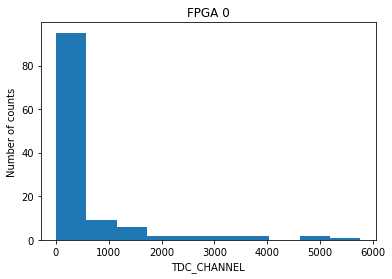

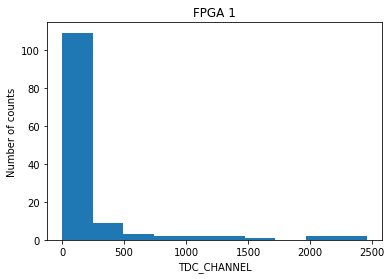

In [ ]:
#!/usr/bin/env python
import matplotlib.pyplot as plt

plt.hist(FPGA_0)
plt.title('FPGA 0')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Number of counts')
plt.show()
print("\n")
plt.hist(FPGA_1)
plt.title('FPGA 1')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Number of counts')
plt.show()